Домашнее задание

Что делать

Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [49]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [79]:
df = pd.read_csv('cherepovets.csv').dropna()
df

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Скорость ветра,Эффективная температура
0,01.01.2019,-3.0,-11.8,-4.4,6.0,-10.4
1,02.01.2019,-2.0,-3.8,-2.5,3.0,-6.3
2,03.01.2019,-2.9,-4.5,-3.1,2.0,-6.3
3,04.01.2019,-3.9,-6.3,-4.6,1.0,-7.3
4,05.01.2019,-6.0,-8.6,-6.8,2.0,-10.4
...,...,...,...,...,...,...
356,27.12.2019,0.2,-4.0,-0.6,2.0,-3.5
357,28.12.2019,-3.8,-9.4,-5.9,4.0,-10.8
358,29.12.2019,-7.0,-16.4,-11.9,1.0,-15.3
359,30.12.2019,0.1,-10.1,-3.1,4.0,-7.6


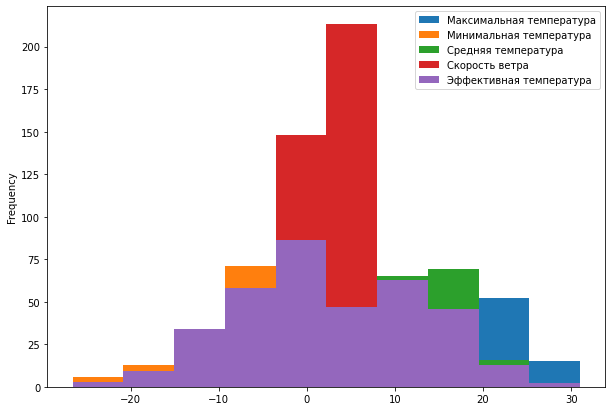

In [88]:
df.plot.hist()
# Распределения различных величин в выборке

([], <a list of 0 Text major ticklabel objects>)

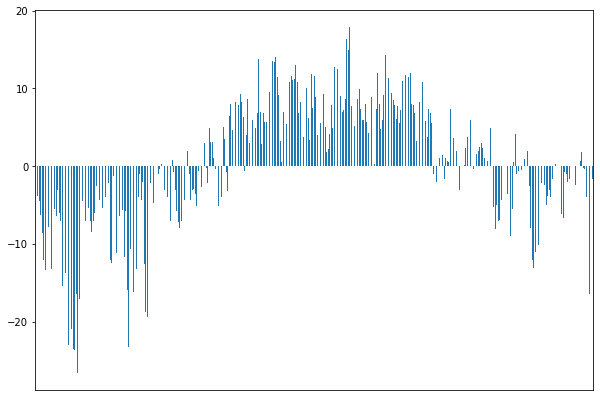

In [35]:
# Смотрим распределений мин. температуры в течение года.
df['Минимальная температура'].plot(kind='bar', rot=45)
plt.xticks([])


([], <a list of 0 Text major ticklabel objects>)

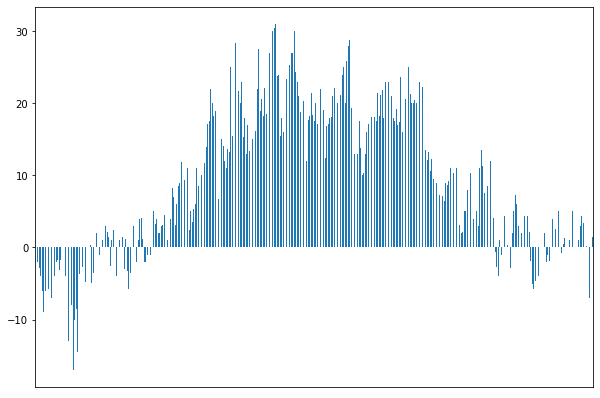

In [41]:
# Смотрим распределений мах. температуры в течение года.
df['Максимальная температура'].plot(kind='bar', rot=45)
plt.xticks([])

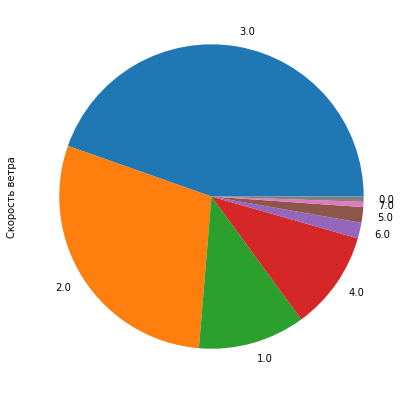

In [45]:
# Смотрим какая скорость ветра преоблада в течение года
Wind_days = df.sort_values('Скорость ветра')['Скорость ветра'].value_counts()
Wind_days.plot(kind='pie', y='Count')
# Чаще всего встречалась скорость ветра от 2 до 3 м/с, ветренных дней со скоростью более 4 - совсем немного

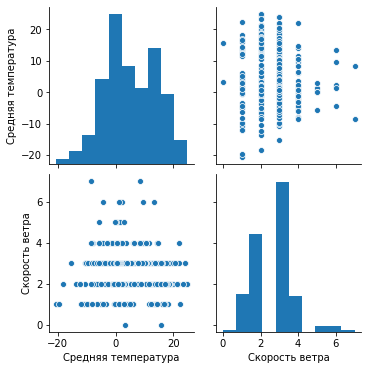

In [89]:
sns_plot = sns.pairplot(df[['Средняя температура', 'Скорость ветра']])
sns_plot

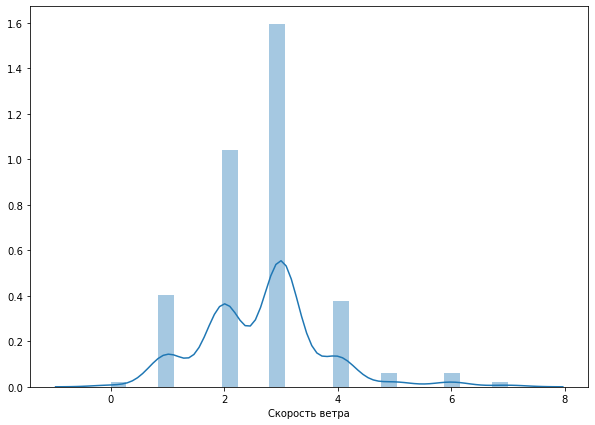

In [46]:
sns.distplot(df['Скорость ветра'])
# Ну мы почти смогли увидеть нормальное распределние :)

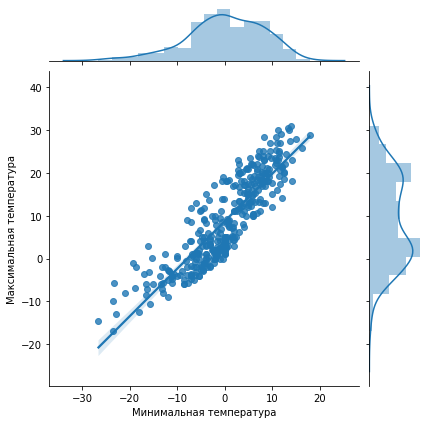

In [48]:
sns.jointplot(x='Минимальная температура', y='Максимальная температура', 
              data=df, kind='reg')
# По линии тренда можно оценить среднегодовую температуру, если сравнивать разные года

In [107]:
data = []
max_wind_speed = df['Скорость ветра'].max()
for ms in range(a.astype(int)):
    data.append(
        go.Box(y=df[df['Скорость ветра']==ms]['Средняя температура'], 
               name=f'Температуры при скорости ветра {ms} м/с')
    )
iplot(data, show_link = False)